#### Tasks Day 25

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

data = {
    'name': ['John', 'Alice', 'Bob', 'Alice', 'David', 'John', 'Rose', 'Tina','Smith','Jack','Rich','Charlie','Arun','Bala','Advika'],
    'age': [25, 30, 22, 30, 28, 25, 26, 34, 25, 26, 29, 24, 32, 31, 28],
    'salary': [50000, 60000, 55000, 60000, 120000, 50000, 53000, 56000, 62000, 61000, 63000, 55000, 58000, 59000, 54000]  # 120000 is an outlier
}

df = pd.DataFrame(data)
print(df)


       name  age  salary
0      John   25   50000
1     Alice   30   60000
2       Bob   22   55000
3     Alice   30   60000
4     David   28  120000
5      John   25   50000
6      Rose   26   53000
7      Tina   34   56000
8     Smith   25   62000
9      Jack   26   61000
10     Rich   29   63000
11  Charlie   24   55000
12     Arun   32   58000
13     Bala   31   59000
14   Advika   28   54000


##### 1. df.duplicated().sum()

In [2]:
# Counts duplicate rows
df.duplicated().sum()

np.int64(2)

##### 2. df.drop_duplicates(inplace=True)

In [3]:
# Removes repeated full rows
df.drop_duplicates(inplace=True)
print(df)

       name  age  salary
0      John   25   50000
1     Alice   30   60000
2       Bob   22   55000
4     David   28  120000
6      Rose   26   53000
7      Tina   34   56000
8     Smith   25   62000
9      Jack   26   61000
10     Rich   29   63000
11  Charlie   24   55000
12     Arun   32   58000
13     Bala   31   59000
14   Advika   28   54000


##### 3. df.drop_duplicates(subset=['name', 'age'], keep='first', inplace=True)

In [4]:
# Removes duplicates based only on selected columns
df.drop_duplicates(subset=['name', 'age'], keep='first', inplace=True)
print(df)

       name  age  salary
0      John   25   50000
1     Alice   30   60000
2       Bob   22   55000
4     David   28  120000
6      Rose   26   53000
7      Tina   34   56000
8     Smith   25   62000
9      Jack   26   61000
10     Rich   29   63000
11  Charlie   24   55000
12     Arun   32   58000
13     Bala   31   59000
14   Advika   28   54000


##### 4. df['name'].is_unique

In [5]:
# Checks whether all values in the column are unique
df['name'].is_unique

True

##### 5. df.boxplot(column=['salary'])

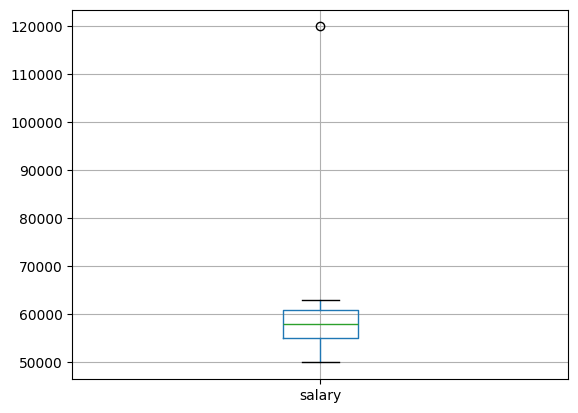

In [6]:
# Creates a boxplot to detect salary outliers (120000 spikes higher)
import matplotlib.pyplot as plt

df.boxplot(column=['salary'])
plt.show()

##### 6. from scipy.stats import zscore
##### 7. df[(np.abs(zscore(df['salary'])) > 3)]

In [ ]:
from scipy.stats import zscore
df['zscore_salary'] = zscore(df['salary'])
print(df)
df[(np.abs(zscore(df['salary'])) > 3)]

       name  age  salary  zscore_salary
0      John   25   50000      -0.700221
1     Alice   30   60000      -0.116703
2       Bob   22   55000      -0.408462
4     David   28  120000       3.384400
6      Rose   26   53000      -0.525166
7      Tina   34   56000      -0.350110
8     Smith   25   62000       0.000000
9      Jack   26   61000      -0.058352
10     Rich   29   63000       0.058352
11  Charlie   24   55000      -0.408462
12     Arun   32   58000      -0.233407
13     Bala   31   59000      -0.175055
14   Advika   28   54000      -0.466814


,name,age,salary,zscore_salary
4,David,28,120000,3.3844


##### 8. Q1 = df['salary'].quantile(0.25)

In [8]:
# 25th percentile
Q1 = df['salary'].quantile(0.25)
print(Q1)

55000.0


##### 9. Q3 = df['salary'].quantile(0.75)

In [9]:
# 75th percentile
Q3 = df['salary'].quantile(0.75)
print(Q3)

61000.0


##### 10. IQR = Q3 - Q1

In [ ]:
IQR = Q3 - Q1
print(IQR)

# Q1 (25%) = lower quartile
# Q3 (75%) = upper quartile
# IQR = Q3 - Q1 → spread of middle 50% of data
# Helps find outliers
# Z-score uses mean and standard deviation
# These get affected (distorted) by extreme values
# One big outlier can change mean and std deviation
# IQR uses quartiles (Q1, Q3)
# Quartiles are not easily affected by extreme values
# IQR is more robust than Z-score

6000.0


##### 11. IQR Method Outliers

In [11]:
df[(df['salary'] < (Q1 - 1.5 * IQR)) | (df['salary'] > (Q3 + 1.5 * IQR))]


,name,age,salary,zscore_salary
4,David,28,120000,3.3844


##### 12. df['salary'] = np.log1p(df['salary'])

In [ ]:
df['salary'] = np.log1p(df['salary'])
print(df)

# np.log1p() is used to shrink large values and reduce skewness, making the data smoother and easier for analysis

       name  age     salary  zscore_salary
0      John   25  10.819798      -0.700221
1     Alice   30  11.002117      -0.116703
2       Bob   22  10.915107      -0.408462
4     David   28  11.695255       3.384400
6      Rose   26  10.878066      -0.525166
7      Tina   34  10.933125      -0.350110
8     Smith   25  11.034906       0.000000
9      Jack   26  11.018646      -0.058352
10     Rich   29  11.050906       0.058352
11  Charlie   24  10.915107      -0.408462
12     Arun   32  10.968216      -0.233407
13     Bala   31  10.985310      -0.175055
14   Advika   28  10.896758      -0.466814


##### 13. Capping / Winsorization

In [14]:
import pandas as pd
import numpy as np

data = {
    'name': ['John', 'Alice', 'Bob', 'Alice', 'David', 'John', 'Rose', 'Tina','Smith','Jack','Rich','Charlie','Arun','Bala','Advika'],
    'age': [25, 30, 22, 30, 28, 25, 26, 34, 25, 26, 29, 24, 32, 31, 28],
    'salary': [50000, 60000, 55000, 60000, 120000, 50000, 53000, 56000, 62000, 61000, 63000, 55000, 58000, 59000, 54000]
}

df = pd.DataFrame(data)

# Step 1: Calculate Q1, Q3, and IQR
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Calculate Upper Bound
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

# Step 3: Replace outliers above upper bound
df.loc[df['salary'] > upper_bound, 'salary'] = upper_bound

print(df)

69500.0
       name  age  salary
0      John   25   50000
1     Alice   30   60000
2       Bob   22   55000
3     Alice   30   60000
4     David   28   69500
5      John   25   50000
6      Rose   26   53000
7      Tina   34   56000
8     Smith   25   62000
9      Jack   26   61000
10     Rich   29   63000
11  Charlie   24   55000
12     Arun   32   58000
13     Bala   31   59000
14   Advika   28   54000
